In [2]:
#Importing necessary python libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

In [3]:
#importing warnings 
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading the data
df = pd.read_excel("South_Wales_Street.xlsx")
df.head()

,Crime ID,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,26c5b051722dfe082e2dc687b4392f66257bb05187ecca...,2019-12-01,-3.179256,51.798979,On or near Well Street,W01001449,Blaenau Gwent 002D,Public order,Status update unavailable,NaN
1,4a195de2dcd1e72481064042a9077188461dee4ddd4fbd...,2019-12-01,-3.179256,51.798979,On or near Well Street,W01001449,Blaenau Gwent 002D,Violence and sexual offences,Status update unavailable,NaN
2,NaN,2019-12-01,-3.244250,51.765624,On or near Sports/Recreation Area,W01001478,Blaenau Gwent 006C,Anti-social behaviour,NaN,NaN
3,f84258f4378af2ca9de2f1ff29e2d3a5a335164a6b0867...,2019-12-01,-0.218972,51.532451,On or near Mostyn Gardens,E01000586,Brent 032E,Violence and sexual offences,Status update unavailable,NaN
4,NaN,2019-12-01,-3.658828,51.634723,On or near Tudor Estate,W01000991,Bridgend 001A,Anti-social behaviour,NaN,NaN


In [5]:
#Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423944 entries, 0 to 423943
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crime ID               313394 non-null  object        
 1   Month                  423944 non-null  datetime64[ns]
 2   Longitude              413045 non-null  float64       
 3   Latitude               413045 non-null  float64       
 4   Location               423944 non-null  object        
 5   LSOA code              413045 non-null  object        
 6   LSOA name              413045 non-null  object        
 7   Crime type             423944 non-null  object        
 8   Last outcome category  313394 non-null  object        
 9   Context                0 non-null       float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 32.3+ MB


In [6]:
#shape of the data 
df.shape

(423944, 10)

# Explarotary Data Analysis 

In [7]:
#Count of offences from 2019 December to 2022 November 
crime_offences = df['Crime type'].value_counts().sort_values(ascending=False)
print(crime_offences)

Violence and sexual offences    128819
Anti-social behaviour           110550
Public order                     42962
Criminal damage and arson        34191
Other theft                      22798
Shoplifting                      21616
Vehicle crime                    18548
Burglary                         14071
Drugs                            13167
Other crime                       6293
Bicycle theft                     4745
Theft from the person             2523
Possession of weapons             2120
Robbery                           1541
Name: Crime type, dtype: int64


In [8]:
#Count of offences each month in different years (in Descending order)
df['Month'].value_counts().sort_values(ascending=False)

2020-05-01    15541
2020-04-01    14346
2021-03-01    14112
2020-06-01    13357
2020-07-01    13098
2020-10-01    13082
2021-01-01    12935
2020-08-01    12812
2020-11-01    12572
2020-09-01    12429
2021-04-01    12340
2021-02-01    12235
2021-05-01    12227
2021-06-01    12164
2021-07-01    11991
2022-08-01    11953
2021-08-01    11749
2021-10-01    11680
2021-09-01    11661
2022-10-01    11636
2022-05-01    11401
2020-01-01    11150
2020-12-01    11084
2021-11-01    11052
2020-02-01    10962
2022-09-01    10840
2022-07-01    10804
2022-03-01    10743
2022-06-01    10641
2022-11-01    10581
2019-12-01    10569
2020-03-01    10322
2022-04-01    10262
2022-01-01    10208
2021-12-01     9757
2022-02-01     9648
Name: Month, dtype: int64

In [9]:
#Monthly Crime count analysis

import plotly.graph_objects as go


# Group data by month and calculate the total number of crimes per month
monthly_crime_count = df.groupby("Month")["Crime type"].count()

# Create a trace for the line graph
trace = go.Scatter(x=monthly_crime_count.index, y=monthly_crime_count.values)

# Create a layout for the graph
layout = go.Layout(
    title="Crime Analysis by Month",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Number of Crimes"),
    width=800,
    height=600,
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the graph
fig.show()


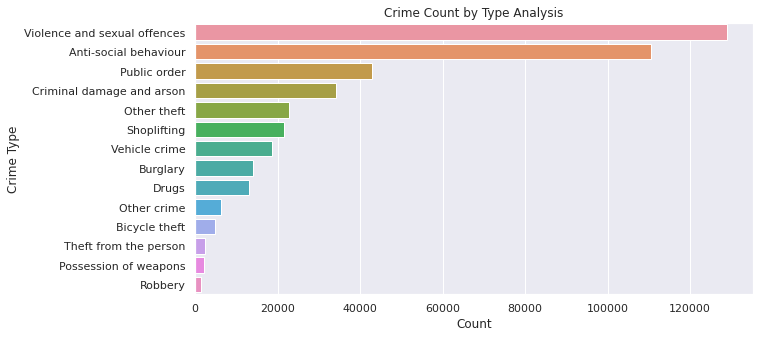

In [10]:
# Crime count analysis

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(x=df['Crime type'].value_counts().values, y=df['Crime type'].value_counts().index, orient="h")

# Add labels and title to the graph
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.title("Crime Count by Type Analysis")

# Show the plot
plt.show()

In [11]:
#Crime Type Visualization

# Calculate the count of unique values in the 'Column' column
value_counts = df['Crime type'].value_counts()

# Convert the value_counts object to a DataFrame
df_value_counts = value_counts.to_frame().reset_index()
df_value_counts.columns = ['Value', 'Count']

# Create a figure with a custom size
fig = go.Figure(data=[go.Pie(labels=df_value_counts['Value'], values=df_value_counts['Count'])])
fig.update_layout(title_text='Crime Type Visualization')
fig.show(config={'displayModeBar': False}, width=10, height=7)


In [12]:
# Crimes by outcomes Pie Chart Analysis

outcome_value_counts = df['Last outcome category'].value_counts()

# Convert the outcome value_counts object to a DataFrame
df_outcome_value_counts = outcome_value_counts.to_frame().reset_index()
df_outcome_value_counts.columns = ['Value', 'Count']

# Create a figure with a custom size
fig = go.Figure(data=[go.Pie(labels=df_outcome_value_counts['Value'], values=df_outcome_value_counts['Count'])])
fig.update_layout(title_text='Crimes by outcomes Pie Chart Analysis')
fig.show(config={'displayModeBar': False}, width=10, height=7)

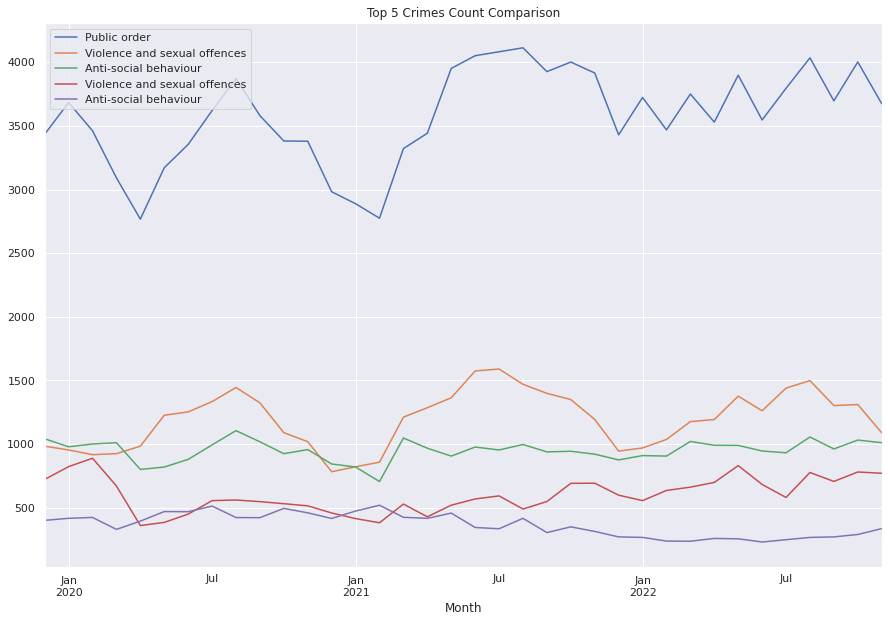

In [13]:

df['By_Month'] = df['Month'].apply(lambda time: time.month)
df['Day_of_Week'] = df['Month'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)
df['By_Month'] = df['By_Month'].map(dmap)
BY_DAY_OF_WK = df.groupby('Day_of_Week').count()

plt.figure(figsize=(15,10))
df[df['Crime type']=='Violence and sexual offences'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Public order'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Criminal damage and arson'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Shoplifting'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Drugs'].groupby('Month').count()['Crime ID'].plot()
plt.title('Top 5 Crimes Count Comparison')
plt.legend(labels=df['Crime type'], loc='upper left')

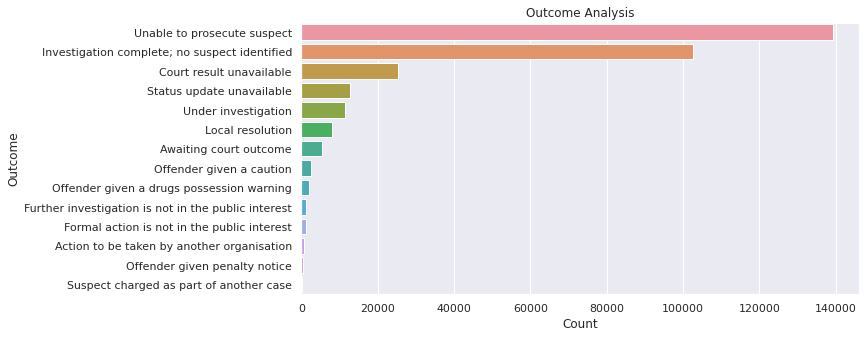

In [15]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(x=df['Last outcome category'].value_counts().values, y=df['Last outcome category'].value_counts().index, orient="h")

# Add labels and title to the graph
plt.xlabel("Count")
plt.ylabel("Outcome")
plt.title("Outcome Analysis")

# Show the plot
plt.show()